/home/andreasstillits/coding/Leaves1D/data/saved_data


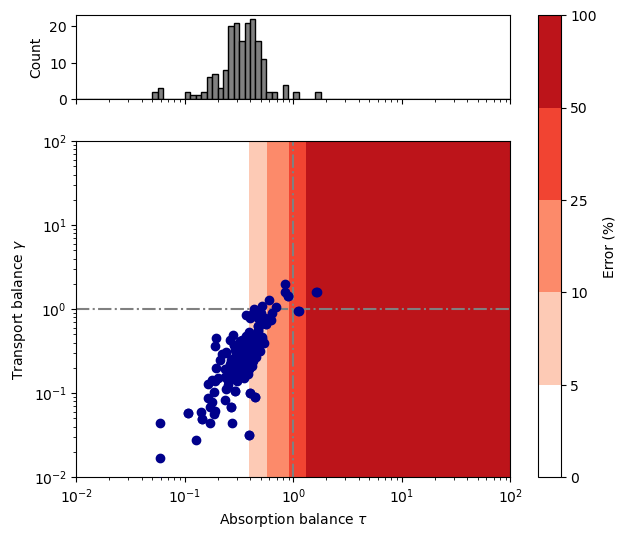

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 



N = 100
gammas = np.exp(np.linspace(np.log(0.01), np.log(100), N))
taus = np.exp(np.linspace(np.log(0.01), np.log(100), N))
error = np.ones((N,N))

for i, gamma in enumerate(gammas):
    error[i,:] = 100*(taus/np.tanh(taus) - 1)

%cd "/home/andreasstillits/coding/Leaves1D/data/saved_data"

df = pd.read_csv("Knauer2022_hypostomatous.csv", decimal=',', sep=';')

# make a custom discrete colormap using "Reds" as a base, with 5 discrete levels

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm

# 5 discrete colors from "Reds"
cmap = plt.get_cmap('Reds', 6)
colors = cmap(range(5))
colors[0] = (1, 1, 1, 1)  # set the first color to white
cmap = ListedColormap(colors)


# manual bounds for the color levels
bounds = [0, 5, 10, 25, 50, 100]
norm = BoundaryNorm(bounds, cmap.N)

# create figure with shared x-axis: histogram on top, pcolor below
fig, (ax_hist, ax_map) = plt.subplots(
    2, 1,
    sharex=True,
    gridspec_kw={"height_ratios": [1, 4]},
    figsize=(7, 6)
 )

# histogram of tau values
# create a binning that has 20 bins between 0.01 and 100, logarithmically spaced
bins = np.logspace(np.log10(0.01), np.log10(100), 4*20+1)

ax_hist.hist(df["tau"], bins=bins, color="grey", edgecolor="black")
ax_hist.set_xscale('log')
ax_hist.set_ylabel('Count')
ax_hist.tick_params(labelbottom=False)  # hide x labels on top axis

# pcolor plot on bottom axis
map = ax_map.pcolor(taus, gammas, error,
                    shading="nearest",
                    cmap=cmap,
                    norm=norm)

fig.colorbar(map, ax=[ax_map, ax_hist], label='Error (%)', boundaries=bounds, ticks=bounds)
ax_map.plot([1, 1], [0.01, 100], color="grey", linestyle='-.', zorder=2)
ax_map.plot([0.01, 100], [1, 1], color="grey", linestyle='-.', zorder=2)
ax_map.scatter(df['tau'], df['gamma'], color="darkblue", marker="o", zorder=3)
ax_map.set_xscale('log')
ax_map.set_yscale('log')
ax_map.set_ylim(0.01, 100)
ax_map.set_xlim(0.01, 100)
ax_map.set_xlabel(r'Absorption balance $\tau$')
ax_map.set_ylabel(r'Transport balance $\gamma$')

# fig.tight_layout()
plt.show()


In [14]:
def get_tau_and_fraction(data: pd.DataFrame, threshold: float = 0.05) -> None:
    taus = np.exp(np.linspace(np.log(0.01), np.log(100), 1000))
    error = taus/np.tanh(taus) - 1 
    idx = np.argwhere(error > threshold)[0][0]
    num_points = np.sum(data["tau"] > taus[idx])
    print(f"Error exceeds {threshold*100:.0f}% for tau > {taus[idx]:.2f}")
    print(f"Fraction of data points with tau > {taus[idx]:.2f}: {100*num_points/len(data):.0f}%", "\n")
    


get_tau_and_fraction(df, threshold=0.05)
get_tau_and_fraction(df, threshold=0.10)

Error exceeds 5% for tau > 0.39
Fraction of data points with tau > 0.39: 38% 

Error exceeds 10% for tau > 0.56
Fraction of data points with tau > 0.56: 7% 



/home/andreasstillits/coding/Leaves1D/data/saved_data


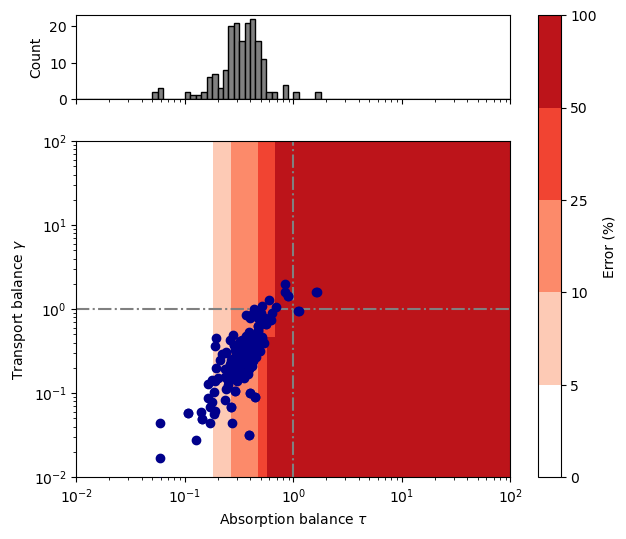

In [26]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 




error3D = 100 * np.loadtxt("/home/andreasstillits/coding/Leaves1D/supplementary/files/lateral_scanning/fine_grained/typical_3Dv0D_error.txt", delimiter=";").T
N = len(error3D)
gammas = np.exp(np.linspace(np.log(0.01), np.log(100), N))
taus = np.exp(np.linspace(np.log(0.01), np.log(100), N))

%cd "/home/andreasstillits/coding/Leaves1D/data/saved_data"

df = pd.read_csv("Knauer2022_hypostomatous.csv", decimal=',', sep=';')

# make a custom discrete colormap using "Reds" as a base, with 5 discrete levels

import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm

# 5 discrete colors from "Reds"
cmap = plt.get_cmap('Reds', 6)
colors = cmap(range(5))
colors[0] = (1, 1, 1, 1)  # set the first color to white
cmap = ListedColormap(colors)


# manual bounds for the color levels
bounds = [0, 5, 10, 25, 50, 100]
norm = BoundaryNorm(bounds, cmap.N)

# create figure with shared x-axis: histogram on top, pcolor below
fig, (ax_hist, ax_map) = plt.subplots(
    2, 1,
    sharex=True,
    gridspec_kw={"height_ratios": [1, 4]},
    figsize=(7, 6)
 )

# histogram of tau values
# create a binning that has 20 bins between 0.01 and 100, logarithmically spaced
bins = np.logspace(np.log10(0.01), np.log10(100), 4*20+1)

ax_hist.hist(df["tau"], bins=bins, color="grey", edgecolor="black")
ax_hist.set_xscale('log')
ax_hist.set_ylabel('Count')
ax_hist.tick_params(labelbottom=False)  # hide x labels on top axis

# pcolor plot on bottom axis
map = ax_map.pcolor(taus, gammas, error3D,
                    shading="nearest",
                    cmap=cmap,
                    norm=norm)

fig.colorbar(map, ax=[ax_map, ax_hist], label='Error (%)', boundaries=bounds, ticks=bounds)
ax_map.plot([1, 1], [0.01, 100], color="grey", linestyle='-.', zorder=2)
ax_map.plot([0.01, 100], [1, 1], color="grey", linestyle='-.', zorder=2)
ax_map.scatter(df['tau'], df['gamma'], color="darkblue", marker="o", zorder=3)
ax_map.set_xscale('log')
ax_map.set_yscale('log')
ax_map.set_ylim(0.01, 100)
ax_map.set_xlim(0.01, 100)
ax_map.set_xlabel(r'Absorption balance $\tau$')
ax_map.set_ylabel(r'Transport balance $\gamma$')

# fig.tight_layout()
plt.show()
